# MNIST dataset

[Original Source](http://yann.lecun.com/exdb/mnist/)

*Load settings*

In [0]:
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

params = {'root_dir': 'data/',
          'batch_size': 128
         }

# Ensure results directory exists
def ensure_dir(root_dir):
  if not os.path.exists(root_dir):
    os.mkdir(root_dir)

ensure_dir(params['root_dir'])

# PyTorch

*Import libraries and settings*

In [0]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Get train and test datasets
subroot_dir = params['root_dir'] + 'pytorch/'
print("To be saved in '{}'".format(subroot_dir))
ensure_dir(subroot_dir)

*Load dataset*

In [0]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
mnist_train = datasets.MNIST(
    root=subroot_dir,  # directory where the data is or where it will be saved
    train=True,  # train dataset
    download=True,  # download if you don't have it
    transform=trans)  # converts PIL.image or np.ndarray to torch.FloatTensor of shape (C, H, W) and normalizes from (0.0, 1.0)

mnist_test = datasets.MNIST(root=subroot_dir, train=False, download=True, transform=trans)

*Dataloader*: In PyTorch, data needs to be in dataloader format to be accepted as input to a model.

In [28]:
print("MNIST Train {}, Test {}".format(len(mnist_train), len(mnist_test)))

# Dataloader: mini-batch during training
mnist_train_dataloader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)
mnist_test_dataloader = torch.utils.data.DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=True)

MNIST Train 60000, Test 10000


*Dataset examples*

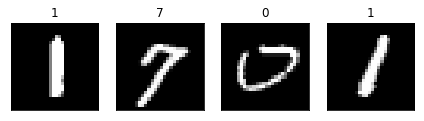

In [77]:
# Plot examples
examples = enumerate(mnist_test_dataloader)
batch_idx, (example_data, example_targets) = next(examples)

fig, axes = plt.subplots(nrows=1, ncols=4)
for i, ax in enumerate(axes.flat):
  ax.imshow(example_data[i][0], cmap='gray')  # Greys
  ax.set_title('{}'.format(example_targets[i]))

  # Remove ticks
  ax.set_xticks([])
  ax.set_yticks([])
  
  plt.tight_layout()

# Tensorflow

*Import libraries and settings*

[Further info](https://nextjournal.com/gkoehler/digit-recognition-with-keras) on training a model

In [0]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

# Get train and test datasets
subroot_dir = params['root_dir'] + 'tf/'
ensure_dir(subroot_dir)

*Load dataset*

In [88]:
mnist = tf.keras.datasets.mnist

# '~/.keras/datasets/' + path
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Train: {}".format(x_train.shape))
print("Test : {}".format(x_test.shape))

Train: (60000, 28, 28)
Test : (10000, 28, 28)


*Dataset examples*

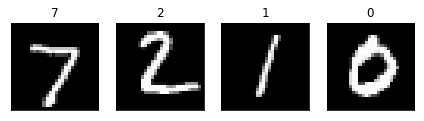

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=4)
for i, ax in enumerate(axes.flat):
  ax.imshow(x_test[i], cmap='gray')  # Greys
  ax.set_title('{}'.format(y_test[i]))

  # Remove ticks
  ax.set_xticks([])
  ax.set_yticks([])
  
  plt.tight_layout()

# Sklearn

*Import libraries and settings*

In [0]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split

*Load dataset from [link](https://www.openml.org/d/554)*

In [5]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("Total shape: {}".format(np.shape(X)))

Total shape: (70000, 784)


In [15]:
# X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)
print("Train: {}".format(np.shape(X_train)))
print("Test: {}".format(np.shape(X_test)))

Train: (60000, 784)
Test: (10000, 784)


*Dataset examples*

Total shape: (10000, 28, 28)


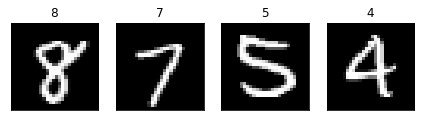

In [16]:
X_test_sample = X_test.reshape((X_test.shape[0], 28, 28))
print("Total shape: {}".format(np.shape(X_test_sample)))

fig, axes = plt.subplots(nrows=1, ncols=4)
for i, ax in enumerate(axes.flat):
  ax.imshow(X_test_sample[i], cmap='gray')  # Greys
  ax.set_title('{}'.format(y_test[i]))

  # Remove ticks
  ax.set_xticks([])
  ax.set_yticks([])
  
  plt.tight_layout()